# introduction
 le dataset suivant presente les differente variable de  la couler du titanique en passant par les passager du navir . il aete publier de base pour 
 
 predire  "quel type de personnes avaient plus de chance de survie "

## OBjectif: identifier les variables les plus correrlées a la survie  

Chargement et apercus du dataset 

In [2]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("data\\train.csv")
print("the dataset heads ")
df.head()


the dataset heads 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df.shape)
colonnes=df.columns.tolist()
print(f'les variables a etudier seront au nombre de {df.shape[1]} dont {colonnes}')

(891, 12)
les variables a etudier seront au nombre de 12 dont ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


Data Dictionary

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower


age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [5]:
print('dataset infos general ')
df.info()


dataset infos general 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print('Statictical presentation of data')
df.describe()

Statictical presentation of data


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Nettoyage 

 gestion des valeur manquantes ,doublons  et transformation des données 

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

il manque quelques que valeurs au niveau de l'age mais surtout au niveeau des numeros de cabine 

nb: je pense que cet variable sera inutilisable  dans notre travail . cotée metier il peut exister plusieur explications a ce manque dont le faite que ce ux etant enregistrer represente les passger de haute classe mais cela n'est que speculation donc pour ne pas porter atteinte a l'integrieter du dataset autant l'ignorer

In [8]:
#remplace toute les valeur manquantes de l'age par la moyenne des valeur pour quelles soient plus complete
df['Age'].fillna(df['Age'].mean(), inplace=True )

C:\Users\USER\AppData\Local\Temp\ipykernel_22980\2253763925.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True )


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

gestion de doublons 

In [10]:
df.drop_duplicates(inplace=True )

gestion des variables categorielles (generalement convertis les objets en valeurs numeriques pour être comprises par l'ordinateur)



In [11]:
df.dtypes
#variable ordinales/celle ayant un ordre definis
# le=LabelEncoder
# df['']=
#variable nominales/celles ayant pas d'ordre comme une liste de villes
df=pd.get_dummies(df,columns=['Embarked'])
# variable binaire / oui,non ou femme ,homme 
df['Sex']=df['Sex'].map({"male":0,"female":1})


In [12]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked_C        bool
Embarked_Q        bool
Embarked_S        bool
dtype: object

# Analyse exploratoire 

Repartition des survivants vs non survivant :

In [13]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [23]:
percentsurvive=df["Survived"].value_counts()[1]/df['Survived'].count()
print(percentsurvive)

0.3838383838383838


il y adonc 38 pourcent de survie parmis les passager du pacbo 

l'objectif mainteneant est d'annalyser les particularité de ce resultat et de constate les liens entre les variables afin d'expliquer les diffents facteurs de survies 



C:\Users\USER\AppData\Local\Temp\ipykernel_22980\2476133683.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x="Survived",palette="pastel")


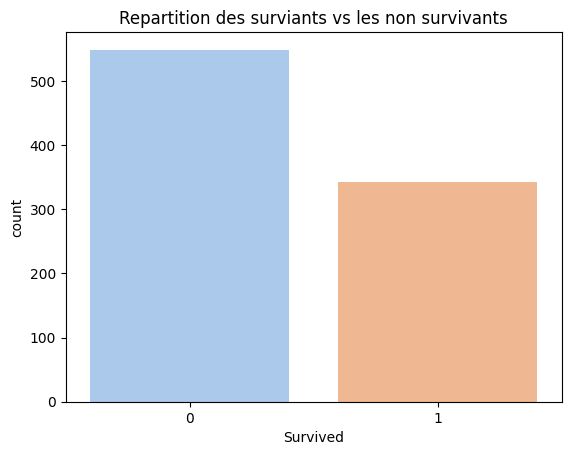

In [14]:
sns.countplot(df,x="Survived",palette="pastel")
plt.title("Repartition des surviants vs les non survivants")
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    bool   
 12  Embarked_Q   891 non-null    bool   
 13  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(6), object(3)
memory usage: 79.3+ KB


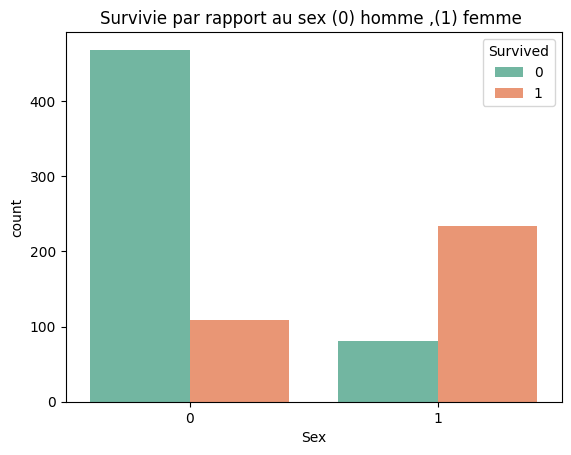

In [30]:
sns.countplot(data=df, x="Sex", hue="Survived",palette="Set2")
plt.title("Survivie par rapport au sex (0) homme ,(1) femme ")
plt.show()

ON constate donc que le taux de survie est plus eleve que chez la femme que chez les hommes (ce qui image les priorités en personnes a sauver en cas de drames )

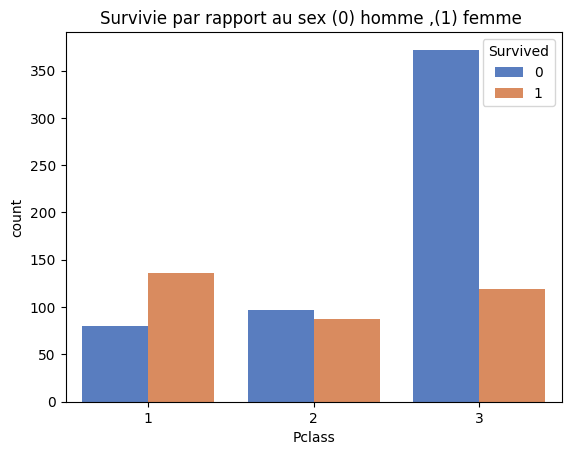

In [35]:
sns.countplot(data=df, x="Pclass", hue="Survived",palette="muted")
plt.title("Survivie par rapport au sex (0) homme ,(1) femme ")
plt.show()

On constate une remonter des chances de survie drastique de la 3eme a la 1ere class  .De par ce graphe il est facile de comprendre le traitement de faveur pour les plus aisés

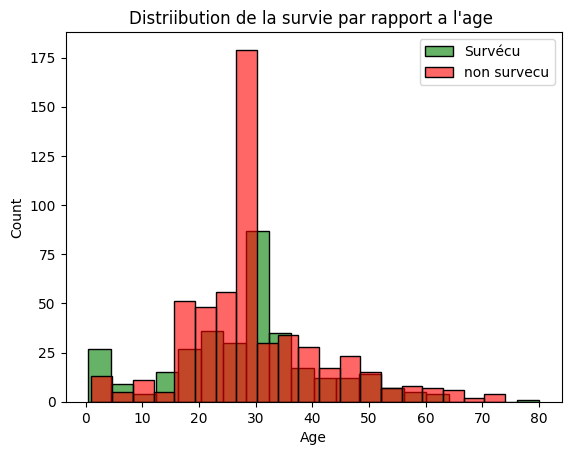

In [36]:
sns.histplot(df[df["Survived"]==1]["Age"],bins=20, color='green',alpha=0.6,label='Survécu')
sns.histplot(df[df['Survived']==0]["Age"],bins=20, color='red',alpha=0.6, label="non survecu")
plt.legend()
plt.title("Distriibution de la survie par rapport a l'age ")
plt.show()

On constate que la grande majoritée des personnes en 15 et 70 ans ont perie contrairement au plus jeunes 

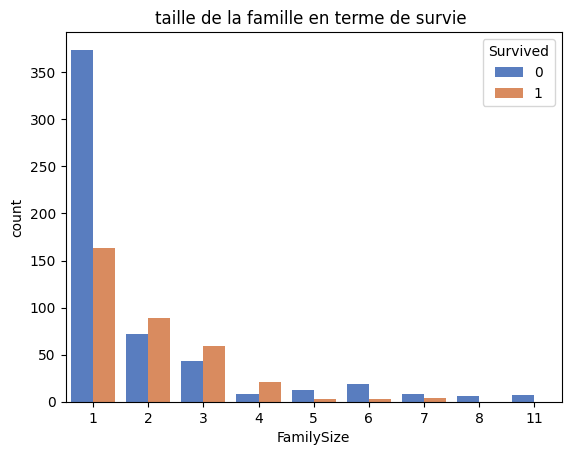

In [39]:
df['FamilySize']=df["SibSp"]+df["Parch"]+1
sns.countplot(data=df, x='FamilySize', hue='Survived', palette='muted')
plt.title("taille de la famille en terme de survie ")
plt.show()

être seul = moins de survie, familles petites = meilleures chances

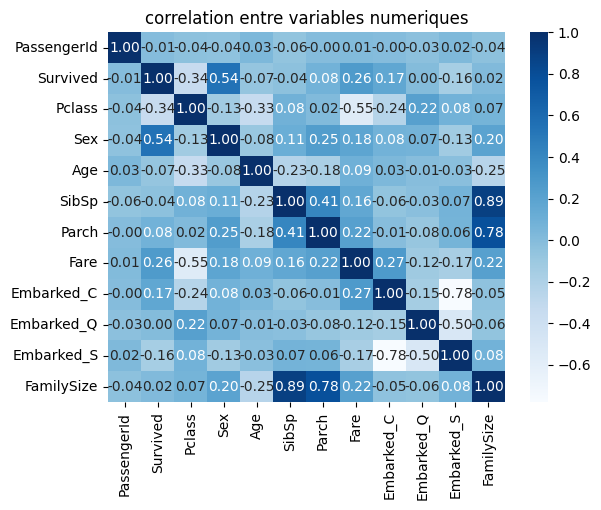

In [41]:
corr=df.corr(numeric_only=True)
plt.Figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='Blues',fmt=".2f")
plt.title('correlation entre variables numeriques')
plt.show()


les variables les plus reliés a la survie sont l'age le sex et la class du passager 

# Conclusion

## 📌 Résultats clés

- Les **femmes** et les **enfants** avaient plus de chances de survie.  
- La **classe sociale** influençait directement la survie (1ère > 2ème > 3ème).  
- La **taille de la famille** a joué un rôle (familles moyennes survivaient mieux).  

---

## 🔗 Dataset

[Titanic – Machine Learning from Disaster (Kaggle)](https://www.kaggle.com/c/titanic/data)

---

## ✍️ Auteur

Projet réalisé par *[Ton Nom]*, étudiant en Data Science, dans le cadre de la constitution d’un portfolio Data.